#### humann2 is a tool for analyzing whole-genome shotgun sequencing data

In [2]:
# install humann2 by running pip install humann2
# already done by Vijay

- neocleotide database is called chocophlan
- protein database is called uniref

In [ ]:
# download databases 
humann2_databases --download chocophlan DEMO humann2_database_downloads
humann2_databases --download uniref DEMO_diamond humann2_database_downloads

- humann2 metagenomics workflow

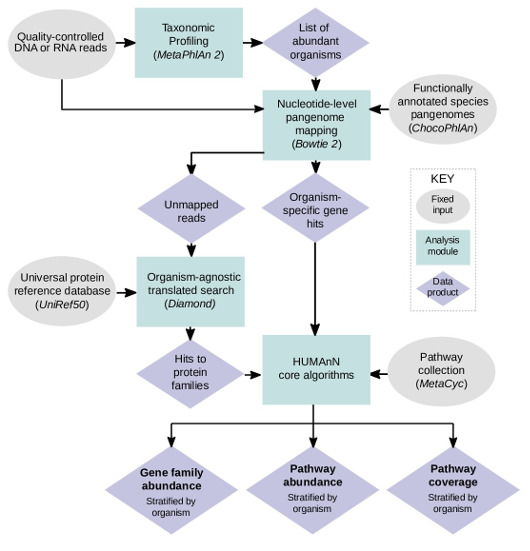

In [4]:
from IPython.display import Image
Image(filename = "data/humann2_diamond_500x500.jpg", width=500)

- let's do a demo run
- directly compare demo.fastq to the protein database
- skip nucleotide search

In [1]:
humann2 --input data/demo.fastq \
        --output out_humann2 \
        --bypass-nucleotide-search

Creating output directory: /Users/husenzhang/Documents/GitHub/FAES_metagenomics/out_humann2
Output files will be written to: /Users/husenzhang/Documents/GitHub/FAES_metagenomics/out_humann2

Running diamond ........


Aligning to reference database: uniref90_demo_prots.dmnd

Total bugs after translated alignment: 1
unclassified: 988 hits

Total gene families after translated alignment: 47

Unaligned reads after translated alignment: 95.4238095238 %


Computing gene families ...

Computing pathways abundance and coverage ...

Output files created: 
/Users/husenzhang/Documents/GitHub/FAES_metagenomics/out_humann2/demo_genefamilies.tsv
/Users/husenzhang/Documents/GitHub/FAES_metagenomics/out_humann2/demo_pathabundance.tsv
/Users/husenzhang/Documents/GitHub/FAES_metagenomics/out_humann2/demo_pathcoverage.tsv



- Gene family abundance

In [4]:
head out_humann2/demo_genefamilies.tsv

# Gene Family	demo_Abundance-RPKs
UNMAPPED	20039.0000000000
UniRef90_X6L320	28.0905985144
UniRef90_X6L320|unclassified	28.0905985144
UniRef90_U5FT06	25.9926484436
UniRef90_U5FT06|unclassified	25.9926484436
UniRef90_W8YTG4	25.2752668904
UniRef90_W8YTG4|unclassified	25.2752668904
UniRef90_Q9ZUH4	23.5421011503
UniRef90_Q9ZUH4|unclassified	23.5421011503


- pathway abundance

In [6]:
head out_humann2/demo_pathabundance.tsv

# Pathway	demo_Abundance
UNMAPPED	6418.1601776341
UNINTEGRATED	80.8363195902
UNINTEGRATED|unclassified	80.8363195902
PWY-6305: putrescine biosynthesis IV	30.3913024756
PWY-6305: putrescine biosynthesis IV|unclassified	30.3913024756
PWY-4203: volatile benzenoid biosynthesis I (ester formation)	22.5319052245
PWY-4203: volatile benzenoid biosynthesis I (ester formation)|unclassified	22.5319052245
PWY490-3: nitrate reduction VI (assimilatory)	21.3761301200
PWY490-3: nitrate reduction VI (assimilatory)|unclassified	21.3761301200


 - hmp_pathabund.pcl is a human microbiome dataset 
 - from bitbucket.org/biobakery/biobakery/raw/tip/demos/biobakery_demos/data/humann2/input/hmp_pathabund.pcl
 - we use this dataset as an example of plotting
 - look at the data

In [3]:
head -4 data/hmp_pathabund.pcl | cut -f1-4

FEATURE \ SAMPLE	SRS011084	SRS011086	SRS011090
STSite	Stool	Tongue_dorsum	Buccal_mucosa
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis	0.000498359	0.000628096	0.000304951
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Acidovorax.s__Acidovorax_ebreus	0	0	0


- now plot the data using humann2 barplot script
- this script depends on matplotlib

In [7]:
humann2_barplot --input data/hmp_pathabund.pcl \
  --focal-feature METSYN-PWY \
  --focal-metadatum STSite \
  --last-metadatum STSite \
  --output out_humann2/plot1.png

- we produced a plot called plot1.png
- now take a look at it by double click it

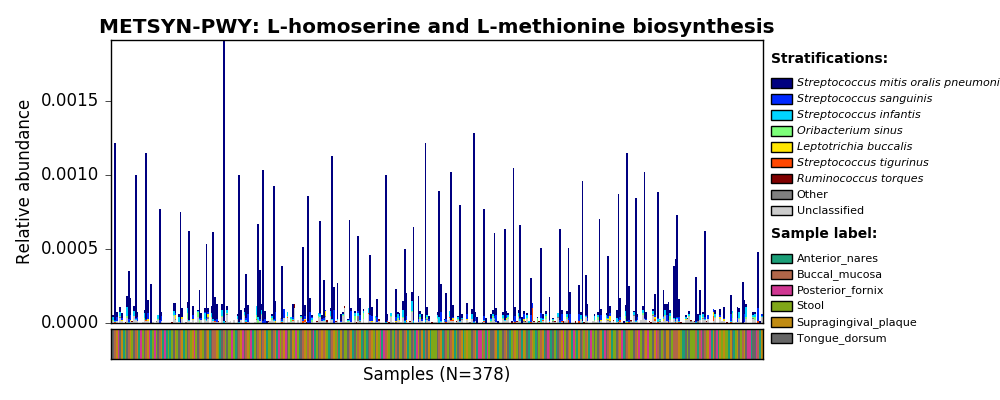

In [14]:
from IPython.display import Image
PATH = "out_humann2/"
Image(filename = PATH + "plot1.png", width=550)

- the plot is messy
- let's "sort" on the stratified abundance:

In [4]:
humann2_barplot --sort sum \
        --input data/hmp_pathabund.pcl \
        --focal-feature METSYN-PWY \
        --focal-metadatum STSite \
        --last-metadatum STSite \
        --output out_humann2/plot2.png

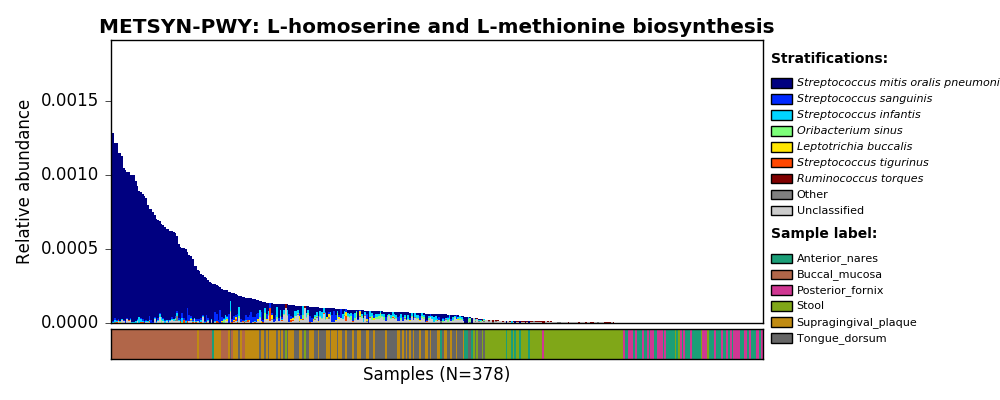

In [1]:
from IPython.display import Image
PATH = "out_humann2/"
Image(filename = PATH + "plot2.png", width=550)

- A pattern has started to emerge: we can clearly see that the oral body sites are enriched on the left (high) end of the plot, 
- We can continue this line of analysis with an additional grouping by body site:

In [1]:
humann2_barplot --sort sum metadata \
--input data/hmp_pathabund.pcl \
--focal-feature METSYN-PWY \
--focal-metadatum STSite \
--last-metadatum STSite \
--output out_humann2/plot3.png

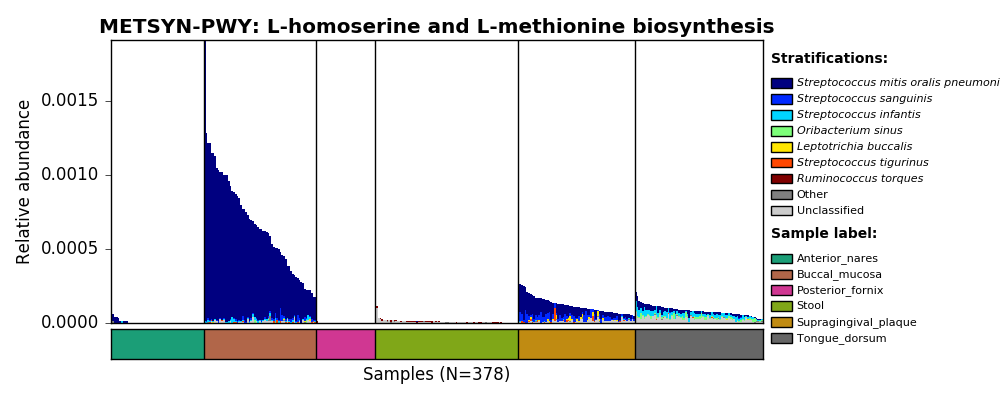

In [2]:
from IPython.display import Image
PATH = "out_humann2/"
Image(filename = PATH + "plot3.png", width=550)

one additional pathway, COA-PWY: coenzyme A biosynthesis, which is more broadly conserved across body sites:

In [1]:
humann2_barplot --sort sum --input data/hmp_pathabund.pcl \
--focal-feature COA-PWY --focal-metadatum STSite \
--last-metadatum STSite --output out_humann2/plot4.png

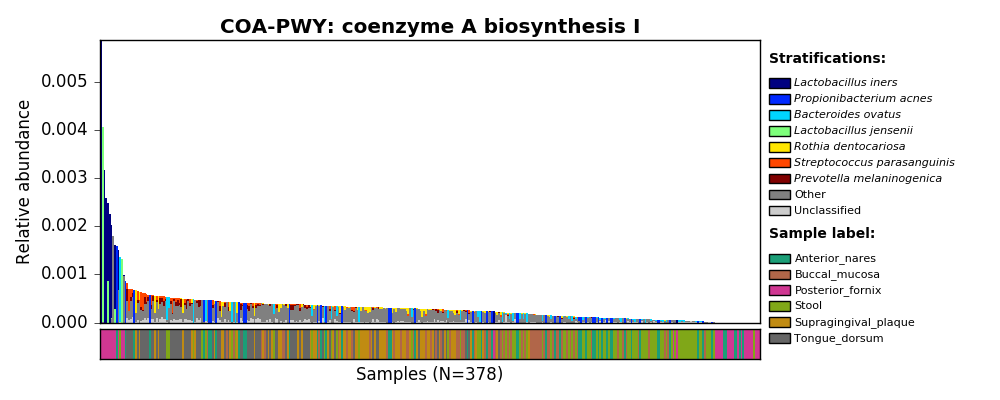

In [1]:
from IPython.display import Image
PATH = "out_humann2/"
Image(filename = PATH + "plot4.png", width=550)

sorting by ecological similarity, normalizing pathway contributions within-sample, and expanding the list of species highlighted:

In [1]:
humann2_barplot --sort similarity --top-strata 12 \
--scaling normalize --input data/hmp_pathabund.pcl \
--focal-feature COA-PWY --focal-metadatum STSite \
--last-metadatum STSite --output out_humann2/plot5.png

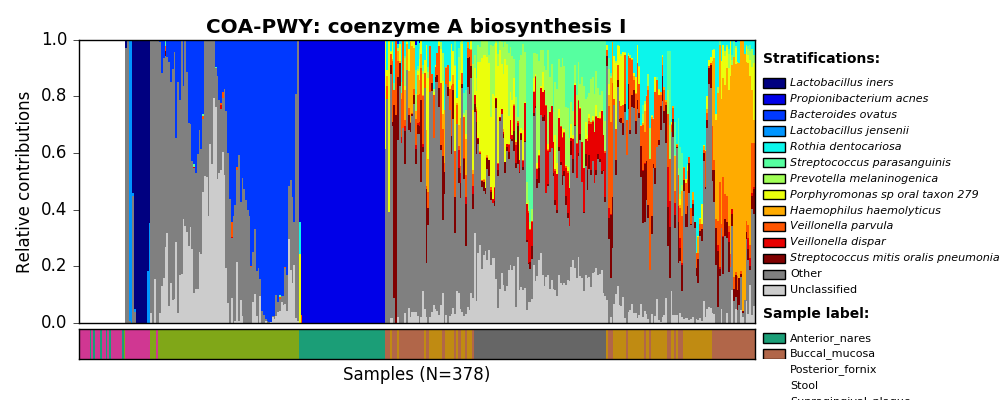

In [5]:
from IPython.display import Image
PATH = "out_humann2/"
Image(filename = PATH + "plot5.png", width=600)

that's a wrap for humann2